In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
# Import TensorFlow and Keras components for building the neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\Windows 10\Downloads\gld_price_data.csv')

In [53]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_13316\3473270334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall')


Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

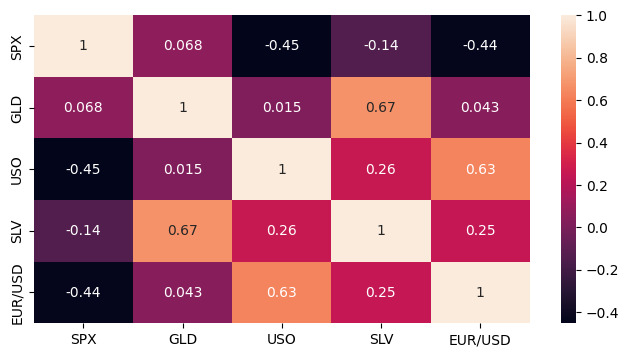

In [54]:
corr = df.corr(method='kendall')
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True)
df.columns

In [55]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

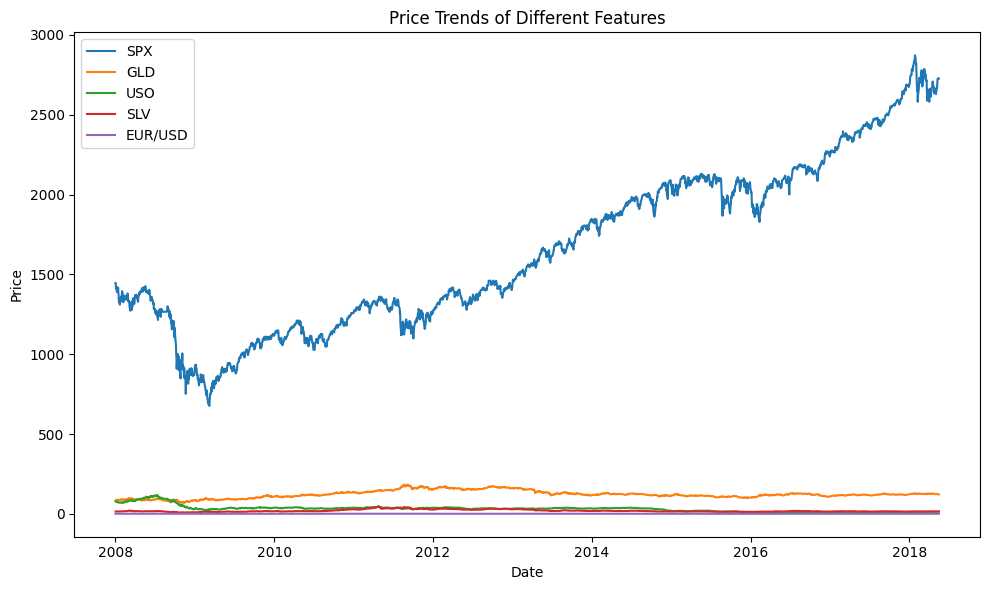

In [56]:
# Create a line plot
plt.figure(figsize=(10, 6))

pfeatures = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

for feature in features:
    plt.plot(df['Date'], df[feature], label=feature)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends of Different Features')
plt.legend()
plt.tight_layout()

plt.show()

In [57]:
X = df[['SPX','USO','SLV','EUR/USD']]
y = df['GLD']

In [58]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [59]:
scaler = MinMaxScaler()

In [60]:
# Scale the training and testing data using MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
model = Sequential()

In [62]:
# Add layers to the neural network model
model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [63]:
# Compile the model with loss function and optimizer
model.compile(loss="mean_squared_error",optimizer='Adam')

In [64]:
# Train the model using the training data
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
52/52 [==============================] - 2s 7ms/step - loss: 15539.5498 - val_loss: 15373.6631
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 15446.6748 - val_loss: 15258.4053
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 15274.3242 - val_loss: 15016.6709
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 14932.6318 - val_loss: 14554.9814
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 14309.8701 - val_loss: 13762.3330
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 13323.6494 - val_loss: 12591.3203
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 11954.2959 - val_loss: 11050.6973
Epoch 8/50
52/52 [==============================] - 0s 3ms/step - loss: 10245.1133 - val_loss: 9215.4541
Epoch 9/50
52/52 [==============================] - 0s 3ms/step - loss: 8300.8916 - val_loss: 7233.2793
Epoch 10/50
52/52 [==============================

In [65]:
# Generate predictions using the trained model
y_pred = model.predict(X_test_scaled)

15/15 [==============================] - 0s 2ms/step


In [66]:
from sklearn.metrics import r2_score

In [67]:
# Calculate the R2 score between predicted and actual values
r2_score(y_test,y_pred)

0.7017193047268966